Importing Libraries

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression

Importing Data

In [2]:
path = "../../Data/Car details v3.csv"
df = pd.read_csv(path)
df.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Checking missing values

In [4]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)
print("after removing nullvalues:")
df.isnull().sum()

after removing nullvalues:


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
df["mileage"]=df["mileage"].str.extract(r"(\d+\.\d+|\d+)").astype(float)
df['engine'] = df['engine'].str.extract(r'(\d+)').astype(float)
df['max_power'] = df['max_power'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 864.7+ KB


In [8]:
df=df.drop(columns=["torque"])
df['fuel'].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['owner'] = le.fit_transform(df['owner'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])

#df['fuel'].unique()
df["owner"].unique()

array([0, 2, 4, 1, 3])

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [12]:
scaler = StandardScaler()
df[['km_driven', 'mileage', 'engine', 'max_power']] = scaler.fit_transform(df[['km_driven', 'mileage', 'engine', 'max_power']])



In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,1.343777,1,1,1,0,0.986157,-0.418188,-0.492024,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,0.894744,1,1,1,2,0.426198,0.077980,0.333827,5.0
2,Honda City 2017-2020 EXi,2006,158000,1.246926,3,1,1,4,-0.426129,0.075995,-0.380120,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,1.018008,1,1,1,0,0.887050,-0.124457,-0.044408,5.0
4,Maruti Swift VXI BSIII,2007,130000,0.894744,3,1,1,0,-0.822561,-0.318955,-0.094765,5.0


Scaling

In [14]:
X = df.drop(columns=['selling_price',"name"]) 
y = df['selling_price'] 

Splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
5113,2006,0.542561,3,1,1,2,-0.426129,0.075995,-0.380120,5.0
3835,2019,-0.866170,1,1,0,0,-0.351798,1.012761,2.753189,5.0
420,2017,-0.768650,3,2,1,0,-0.654077,0.074011,-0.079938,5.0
8075,2014,0.366470,1,1,1,2,1.682390,-0.418188,-0.086372,5.0
29,2018,-0.778124,3,1,1,0,-0.649122,-1.315261,-1.605468,8.0


Setting up model

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predict on test set

In [17]:
y_pred = model.predict(X_test)

Evaluate performance

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 266739.34555597435
Mean Squared Error: 177891081628.5073
R² Score: 0.6704409489168515


Vsualization

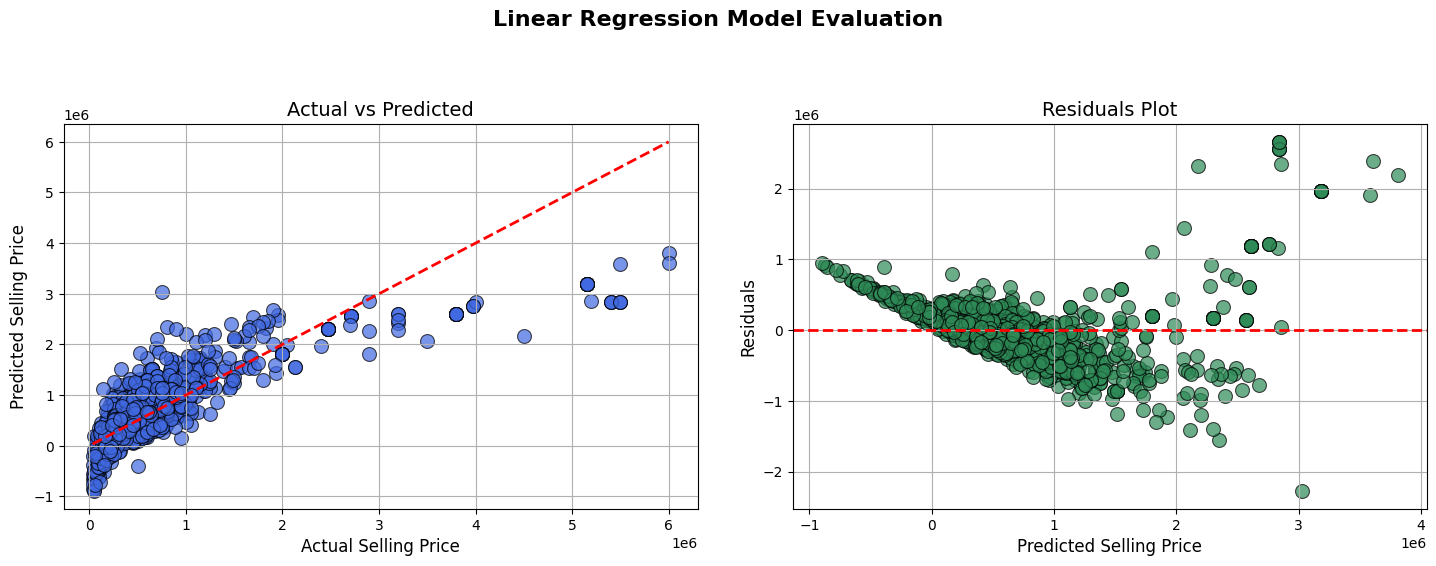

In [19]:
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot 1: Actual vs Predicted ---
sns.scatterplot(ax=axes[0], x=y_test, y=y_pred, color='royalblue', s=100, alpha=0.7, edgecolor='black')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Selling Price', fontsize=12)
axes[0].set_ylabel('Predicted Selling Price', fontsize=12)
axes[0].set_title('Actual vs Predicted', fontsize=14)
axes[0].grid(True)

# --- Plot 2: Residuals Plot ---
sns.scatterplot(ax=axes[1], x=y_pred, y=residuals, color='seagreen', s=100, alpha=0.7, edgecolor='black')
axes[1].axhline(0, color='red', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Selling Price', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals Plot', fontsize=14)
axes[1].grid(True)

# Layout adjustment
plt.suptitle('Linear Regression Model Evaluation', fontsize=16, fontweight='bold')
plt.tight_layout(pad=3.0)
plt.show()

data entry

Important entries


Fuel Type:
Petrol	0
Diesel	1
CNG	2
LPG	3
Electric 4

Seller Type:
Dealer	0
Individual	1
Trustmark Dealer 2

Transmission Type
Manual	0
Automatic 1

Ownership Type
First Owner	0
Second Owner 1
Third Owner	2
Fourth & Above Owner 3
Test Drive Car	4

In [20]:
def predict_price(model, scaler, input_data):
    input_df = pd.DataFrame([input_data])
    expected_columns = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission',
                        'owner', 'mileage', 'engine', 'max_power', 'seats']
    
    input_df = input_df[expected_columns]
    if scaler:
        input_df[['km_driven', 'mileage', 'engine', 'max_power']] = scaler.transform(input_df[['km_driven', 'mileage', 'engine', 'max_power']])

    predicted_price = model.predict(input_df)[0]

    return f"Predicted Selling Price: ₹{predicted_price:,.2f}"

new_car = {
    'year':2004 ,
    'km_driven': 25000,
    'fuel': 0,
    'seller_type': 1,
    'transmission': 0,
    'owner': 0,
    'mileage': 30,
    'engine': 1000,
    'max_power': 80,
    'seats': 5
}

print(predict_price(model, scaler, new_car))


Predicted Selling Price: ₹744,682.43
